<a href="https://colab.research.google.com/github/lanymo/Parrot_ML/blob/main/Parrot_1%EC%A1%B0_2nd_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [ ]:
import pandas as pd


data = pd.read_csv("Kor_income.csv")

#from google.colab import drive
#drive.mount('/content/drive')

#data = pd.read_csv("/content/drive/MyDrive/data/Kor_income.csv")
df = data.copy()
df

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.000000
1,67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.000000
2,38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.000000
3,72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.000000
4,21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,45471,42380101,2007,3,2,4,1,1965,5,1,2,941,5,,5860.000000
78924,27886,26140101,2006,2,2,4,1,1972,5,1,1,512,2,,3744.000000
78925,41941,38910101,2006,2,2,4,1,1941,2,1,2,,,7,2837.441215
78926,61686,55380101,2018,14,7,1,2,1936,3,2,2,,,10,1697.000000


1. 수치형 컬럼으로 변환!

In [ ]:
import copy
new_df = copy.deepcopy(df) # deepcopy 를 이용하여 원본 데이터의 손상을 막음
for col in new_df.columns:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

new_df.head(10)

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,77530,68460101,2005,1,3,1,2,1940,2,2,1,617.0,1.0,NaN,460.0
1,67016,59620101,2018,14,4,3,1,1939,5,1,2,NaN,NaN,9.0,1713.0
2,38931,35960101,2012,8,2,3,1,1967,6,3,1,510.0,1.0,NaN,2854.0
3,72033,63870101,2011,7,4,5,1,1947,3,1,1,611.0,1.0,NaN,4290.0
4,21862,20620101,2017,13,4,2,1,1940,2,1,2,NaN,NaN,10.0,1608.0
5,17575,16890101,2007,3,3,3,1,1937,4,1,1,912.0,3.0,NaN,1502.0
6,25998,24350101,2005,1,2,2,1,1940,5,1,2,NaN,NaN,NaN,1837.0
7,35131,32280101,2015,11,3,4,1,1975,7,1,2,235.0,10.0,NaN,8455.0
8,18518,17600101,2016,12,3,3,1,1967,7,5,2,NaN,NaN,NaN,1570.0
9,33507,30810101,2007,3,5,5,1,1968,5,1,2,811.0,3.0,NaN,4190.0


# 2. 관련없는 컬럼인 Unnamed: 0 삭제

In [ ]:
new_df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
new_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1,3,1,2,1940,2,2,1,617.0,1.0,NaN,460.000000
1,59620101,2018,14,4,3,1,1939,5,1,2,NaN,NaN,9.0,1713.000000
2,35960101,2012,8,2,3,1,1967,6,3,1,510.0,1.0,NaN,2854.000000
3,63870101,2011,7,4,5,1,1947,3,1,1,611.0,1.0,NaN,4290.000000
4,20620101,2017,13,4,2,1,1940,2,1,2,NaN,NaN,10.0,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,42380101,2007,3,2,4,1,1965,5,1,2,941.0,5.0,NaN,5860.000000
78924,26140101,2006,2,2,4,1,1972,5,1,1,512.0,2.0,NaN,3744.000000
78925,38910101,2006,2,2,4,1,1941,2,1,2,NaN,NaN,7.0,2837.441215
78926,55380101,2018,14,7,1,2,1936,3,2,2,NaN,NaN,10.0,1697.000000


# 3. 이상치 삭제
- 삭제를 사용한 이유: 이상치들의 양이 전체 데이터의 약 0.1% 정도밖에 되지 않았기 때문에 이상치를 제거하는 것이 머신러닝의 정확도를 높여줄 것이라고 생각했음
- 다시 말해, 이상치가 있는 부분에서 특별한 의미를 찾기 힘들 것이라고 판단했음

In [ ]:
new_df.describe()

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
count,7.892800e+04,78928.000000,78928.000000,78928.000000,78928.000000,78928.000000,78928.000000,78928.000000,78928.000000,78928.000000,50276.000000,50277.000000,27395.000000,78928.000000
mean,4.366655e+07,2011.507539,7.507539,3.691732,2.482414,1.296143,1952.929619,4.509756,1.681685,1.500215,616.474700,3.435468,8.721080,3439.154493
std,2.617391e+07,4.011209,4.011209,2.060393,1.291998,0.456558,16.017950,1.669101,1.105956,0.532307,298.882557,3.437107,5.085039,4270.074315
min,1.010100e+04,2005.000000,1.000000,1.000000,1.000000,1.000000,1910.000000,2.000000,0.000000,1.000000,12.000000,1.000000,0.000000,-232174.000000
25%,2.180010e+07,2008.000000,4.000000,2.000000,1.000000,1.000000,1939.000000,3.000000,1.000000,1.000000,412.000000,1.000000,8.000000,1133.000000
50%,4.323010e+07,2012.000000,8.000000,3.000000,2.000000,1.000000,1952.000000,5.000000,1.000000,1.000000,611.000000,2.000000,10.000000,2426.000000
75%,6.188010e+07,2015.000000,11.000000,5.000000,3.000000,2.000000,1966.000000,5.000000,2.000000,2.000000,873.000000,5.000000,10.000000,4692.000000
max,9.800070e+07,2018.000000,14.000000,7.000000,9.000000,2.000000,2002.000000,9.000000,9.000000,9.000000,9999.000000,99.000000,99.000000,468209.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f20f06a18a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f20f06a1de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f20f06a1600>],
 'medians': [<matplotlib.lines.Line2D at 0x7f20f06a2320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f20f06a25c0>],
 'means': []}

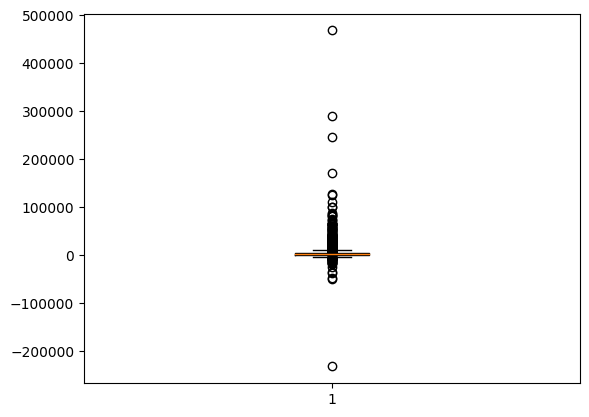

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(new_df['income'])

In [ ]:
new_df[new_df['income'] < 0]
# income이 0 미만인 경우는 161가지

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
46,59280101,2012,8,7,3,1,1947,3,1,2,611.0,1.0,NaN,-1772.000000
198,5960101,2006,2,1,1,2,1933,2,2,2,NaN,NaN,4.0,-4365.707868
205,24140101,2006,2,2,2,1,1945,3,1,1,941.0,3.0,NaN,-218.811691
210,36500101,2008,4,5,4,1,1973,7,1,2,761.0,2.0,NaN,-7834.000000
253,49100101,2012,8,5,4,1,1965,5,1,1,151.0,1.0,NaN,-1328.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76352,14570101,2006,2,3,4,1,1963,5,1,1,713.0,1.0,NaN,-595.000000
77466,45830101,2007,3,6,2,1,1947,3,1,2,611.0,1.0,NaN,-418.000000
78003,61430101,2016,12,4,2,1,1943,4,1,1,613.0,1.0,NaN,-587.000000
78276,21160101,2010,6,4,2,1,1944,5,1,1,611.0,1.0,NaN,-47.000000


In [ ]:
new_df.isna().sum()

id                        0
year                      0
wave                      0
region                    0
family_member             0
gender                    0
year_born                 0
education_level           0
marriage                  0
religion                  0
occupation            28652
company_size          28651
reason_none_worker    51533
income                    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f20ee5b5ab0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f20ee5b5ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f20ee5b5810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f20ee5b62f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f20ee5b6590>],
 'means': []}

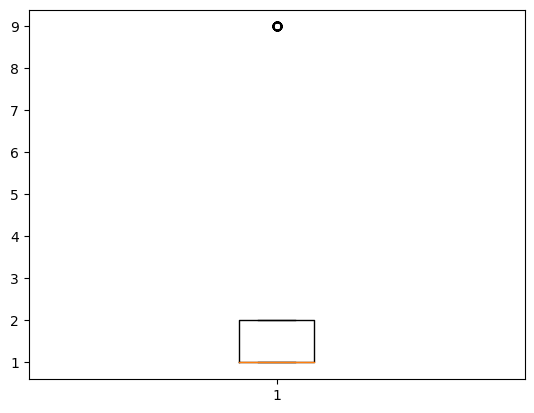

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(new_df['religion'])

In [ ]:
len(new_df[new_df['religion'] > 2])
# religion에서 이상치는 2개. 전부 9로 기록되어있음

47

{'whiskers': [<matplotlib.lines.Line2D at 0x7f20ee6398d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f20ee639e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f20ee639630>],
 'medians': [<matplotlib.lines.Line2D at 0x7f20ee63a380>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f20ee63a620>],
 'means': []}

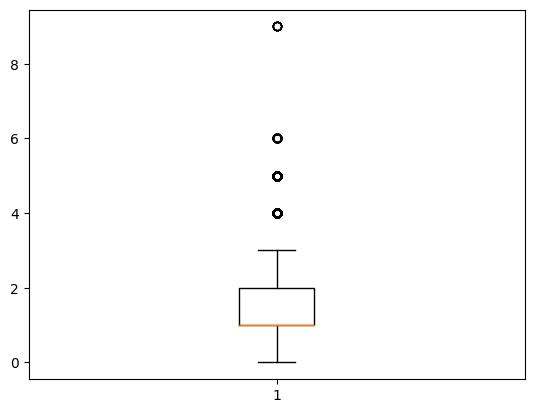

In [ ]:
plt.boxplot(new_df['marriage'])
# 이 중에서 컬럼 설명서에서는 나올 수 없는 9를 제거할 이상치로 보자!

In [ ]:
len(new_df[new_df['marriage']  == 9])
# marriage가 이상치인 경우는 7가지

7

In [ ]:
# 그러면 이제 이상치가 있는 경우들을 삭제하자.
new_df = new_df[new_df['income'] >= 0]
new_df = new_df[new_df['religion'] <= 2]
new_df = new_df[new_df['marriage'] < 9]
new_df = new_df[new_df['marriage'] != 0]
new_df.drop(new_df[new_df['company_size'] == 99].index,inplace=True)


new_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1,3,1,2,1940,2,2,1,617.0,1.0,NaN,460.000000
1,59620101,2018,14,4,3,1,1939,5,1,2,NaN,NaN,9.0,1713.000000
2,35960101,2012,8,2,3,1,1967,6,3,1,510.0,1.0,NaN,2854.000000
3,63870101,2011,7,4,5,1,1947,3,1,1,611.0,1.0,NaN,4290.000000
4,20620101,2017,13,4,2,1,1940,2,1,2,NaN,NaN,10.0,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,42380101,2007,3,2,4,1,1965,5,1,2,941.0,5.0,NaN,5860.000000
78924,26140101,2006,2,2,4,1,1972,5,1,1,512.0,2.0,NaN,3744.000000
78925,38910101,2006,2,2,4,1,1941,2,1,2,NaN,NaN,7.0,2837.441215
78926,55380101,2018,14,7,1,2,1936,3,2,2,NaN,NaN,10.0,1697.000000


In [ ]:
new_df.to_csv('new_df.csv')

In [ ]:
#reason_none_worker가 na면서 occupation이 na거나 company_size가 na인 값들을 제거함!
# ->돈을 벌지 않으면서 나머지 두 값 중 하나가 na라면 직업이 없고, 돈을 벌지 않는 상태라고 판단

new_df[new_df['reason_none_worker'].isna() & new_df['occupation'].isna()].dropna()
new_df[new_df['reason_none_worker'].isna() & new_df['company_size'].isna()].dropna()
new_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1,3,1,2,1940,2,2,1,617.0,1.0,NaN,460.000000
1,59620101,2018,14,4,3,1,1939,5,1,2,NaN,NaN,9.0,1713.000000
2,35960101,2012,8,2,3,1,1967,6,3,1,510.0,1.0,NaN,2854.000000
3,63870101,2011,7,4,5,1,1947,3,1,1,611.0,1.0,NaN,4290.000000
4,20620101,2017,13,4,2,1,1940,2,1,2,NaN,NaN,10.0,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,42380101,2007,3,2,4,1,1965,5,1,2,941.0,5.0,NaN,5860.000000
78924,26140101,2006,2,2,4,1,1972,5,1,1,512.0,2.0,NaN,3744.000000
78925,38910101,2006,2,2,4,1,1941,2,1,2,NaN,NaN,7.0,2837.441215
78926,55380101,2018,14,7,1,2,1936,3,2,2,NaN,NaN,10.0,1697.000000


In [ ]:
new_df[new_df['reason_none_worker'].isna()] = new_df[new_df['reason_none_worker'].isna()].fillna(0)
new_df[new_df['company_size'].isna()] = new_df[new_df['company_size'].isna()].fillna(0)
new_df[new_df['occupation'].isna()] = new_df[new_df['occupation'].isna()].fillna(0)
new_df

#앞서 언급한 경우를 제외하고 남아있는 Nan값을 0으로 설정

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1,3,1,2,1940,2,2,1,617.0,1.0,0.0,460.000000
1,59620101,2018,14,4,3,1,1939,5,1,2,0.0,0.0,9.0,1713.000000
2,35960101,2012,8,2,3,1,1967,6,3,1,510.0,1.0,0.0,2854.000000
3,63870101,2011,7,4,5,1,1947,3,1,1,611.0,1.0,0.0,4290.000000
4,20620101,2017,13,4,2,1,1940,2,1,2,0.0,0.0,10.0,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,42380101,2007,3,2,4,1,1965,5,1,2,941.0,5.0,0.0,5860.000000
78924,26140101,2006,2,2,4,1,1972,5,1,1,512.0,2.0,0.0,3744.000000
78925,38910101,2006,2,2,4,1,1941,2,1,2,0.0,0.0,7.0,2837.441215
78926,55380101,2018,14,7,1,2,1936,3,2,2,0.0,0.0,10.0,1697.000000


In [ ]:
#age 변수 추가
new_df['age'] = new_df['year'] - new_df['year_born'] + 1

In [ ]:
# age에 year과 yearborn을 이용하여 새로운 정보를 뽑아내었으니
# yearborn 컬럼 삭제 (year은 추후 물가 반영에 사용 예정)
# year과 wave는 동일하니 wave 역시 삭제
new_df.drop(columns={"year_born","wave"}, inplace=True)

In [ ]:
new_df.drop(new_df[(new_df['age'] < 18) & (new_df['marriage'] == 2)].index, inplace=True)

new_df

,id,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
0,68460101,2005,3,1,2,2,2,1,617.0,1.0,0.0,460.000000,66
1,59620101,2018,4,3,1,5,1,2,0.0,0.0,9.0,1713.000000,80
2,35960101,2012,2,3,1,6,3,1,510.0,1.0,0.0,2854.000000,46
3,63870101,2011,4,5,1,3,1,1,611.0,1.0,0.0,4290.000000,65
4,20620101,2017,4,2,1,2,1,2,0.0,0.0,10.0,1608.000000,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,42380101,2007,2,4,1,5,1,2,941.0,5.0,0.0,5860.000000,43
78924,26140101,2006,2,4,1,5,1,1,512.0,2.0,0.0,3744.000000,35
78925,38910101,2006,2,4,1,2,1,2,0.0,0.0,7.0,2837.441215,66
78926,55380101,2018,7,1,2,3,2,2,0.0,0.0,10.0,1697.000000,83


In [ ]:
new_df.corr()

,id,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
id,1.000000,0.204756,0.404179,-0.129471,0.069362,-0.171883,0.008498,0.010312,-0.002206,-0.070621,0.046735,-0.082664,0.154449
year,0.204756,1.000000,0.054708,-0.098792,0.069321,0.011183,0.033246,0.026233,-0.035336,-0.014325,0.117788,0.129074,0.171907
region,0.404179,0.054708,1.000000,-0.070719,0.045408,-0.162714,-0.032762,0.047949,0.000425,-0.058100,0.026024,-0.095070,0.120529
family_member,-0.129471,-0.098792,-0.070719,1.000000,-0.493564,0.418744,-0.443539,0.056618,0.275155,0.321933,-0.342197,0.424583,-0.471883
gender,0.069362,0.069321,0.045408,-0.493564,1.000000,-0.421864,0.400351,-0.141403,-0.236606,-0.239791,0.272363,-0.282665,0.291288
education_level,-0.171883,0.011183,-0.162714,0.418744,-0.421864,1.000000,-0.044020,0.046669,0.101832,0.455622,-0.301166,0.408230,-0.628558
marriage,0.008498,0.033246,-0.032762,-0.443539,0.400351,-0.044020,1.000000,0.038487,-0.076075,-0.057929,0.076193,-0.194432,-0.139196
religion,0.010312,0.026233,0.047949,0.056618,-0.141403,0.046669,0.038487,1.000000,0.069250,0.074020,-0.077107,0.033642,-0.145456
occupation,-0.002206,-0.035336,0.000425,0.275155,-0.236606,0.101832,-0.076075,0.069250,1.000000,0.332166,-0.611341,0.138282,-0.314698
company_size,-0.070621,-0.014325,-0.058100,0.321933,-0.239791,0.455622,-0.057929,0.074020,0.332166,1.000000,-0.423590,0.357315,-0.505462


<Axes: >

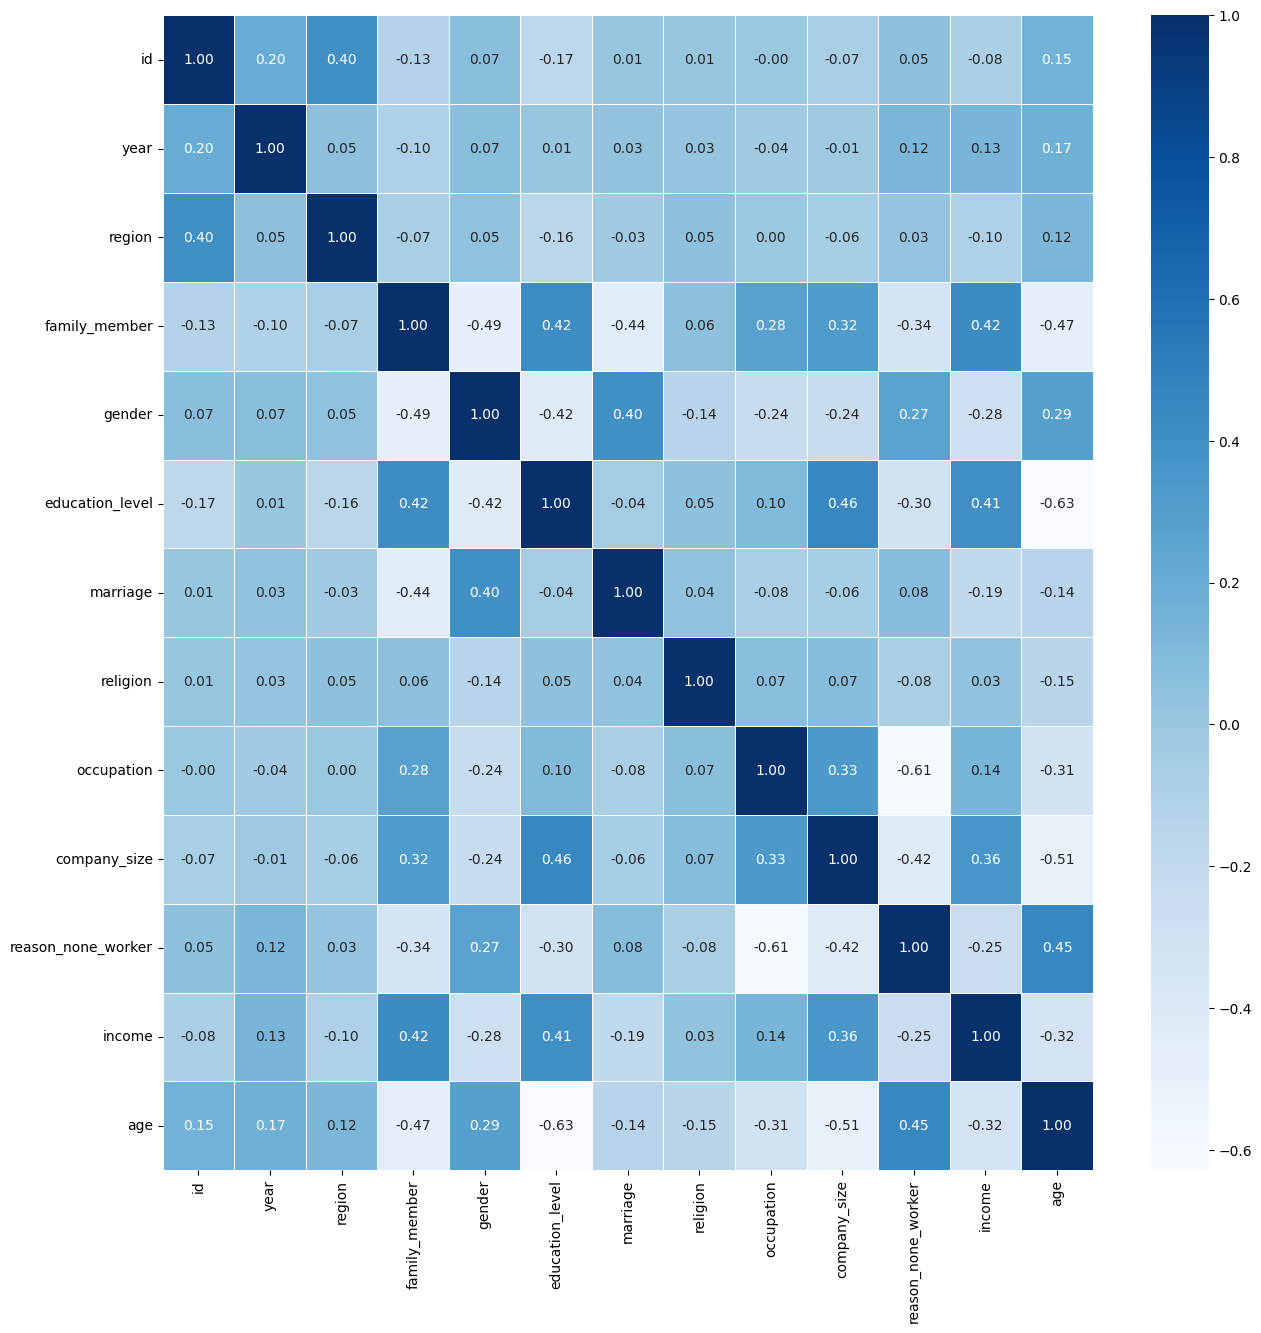

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = new_df.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

#income과의 상관계수의 절댓값이 0.2 이상인 변수들을 주요 변수들로 보고 분석
# -> family_member, gender, education_level, company_size, reason_none_worker, age9

In [ ]:
# 머신에서 좀 더 정확하게 하기 위해 income을 기준으로 오름차순 정렬했음
new_df = new_df.sort_values(by='income')
new_df

,id,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
43857,1410101,2005,1,1,1,5,5,2,0.0,0.0,0.0,0.0,35
24914,53020101,2005,7,1,2,5,3,1,0.0,0.0,4.0,0.0,53
15187,41800101,2005,2,4,1,7,1,1,0.0,0.0,8.0,0.0,56
57704,42360101,2005,2,1,2,5,3,1,0.0,0.0,0.0,0.0,39
34415,15700101,2005,3,3,1,5,1,2,0.0,0.0,0.0,0.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69271,93530701,2016,2,4,1,7,1,2,741.0,2.0,0.0,127763.0,42
16331,30610101,2018,5,4,1,7,1,1,159.0,3.0,0.0,170204.0,50
30020,26300101,2014,2,3,1,7,1,1,153.0,3.0,0.0,245758.0,51
31247,39430101,2010,2,4,1,7,1,2,510.0,2.0,0.0,290062.0,45


In [ ]:
new_df.isna().sum()

id                    0
year                  0
region                0
family_member         0
gender                0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
income                0
age                   0
dtype: int64

### 추후 계획

- 1. 스케일러는 Robust Scaler를 사용할 예정: 나올 수 없는 이상치 외에는 크게 전처리를 하지 않았기에 이상치에 영향을 덜 받는 스케일러 중 하나인 Robust를 사용할 것임

- 2. 물가 반영률을 이용하여 income을 재조정 할 예정: 좀 더 정확한 예측 및 좀 더 많은 의미를 뽑아내기 위함. 아마 year를 뺄 수 있을 것이라고 판단됨.

- 3. 머신러닝에서 머신은 xgboost 를 사용할 예정: NA값을 0으로 처리한 케이스가 많아 xgboost를 사용하는 것이 적합해보임

In [ ]:
def replace_0_1(x):
    if int(x) == 0:
        x = 1
        return x
    else:
        return x
numeric_cols = ["income", "age", "family_member","company_size"]
for x in numeric_cols:
    new_df[x] = new_df[x].apply(replace_0_1)

In [ ]:
def log_transform(x):
    import numpy as np
    if x == 0:
        return x
    else:
        x = np.log(x)
        return x

numeric_cols = ["income", "age", "family_member","company_size"]
for x in numeric_cols:
    new_df[x] = new_df[x].apply(log_transform)

<Axes: >

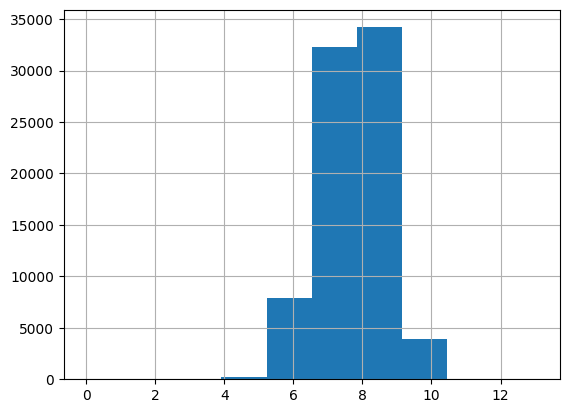

In [ ]:
new_df['income'].hist()

In [ ]:
#region encoding

def major_city(x):
    if x < 3:
        x = 1
        return x
    else:
        x = 0
        return x

new_df['major_city_enc'] = new_df['region'].apply(major_city)
new_df[['region', 'major_city_enc']]

,region,major_city_enc
43857,1,1
24914,7,0
15187,2,1
57704,2,1
34415,3,0
...,...,...
69271,2,1
16331,5,0
30020,2,1
31247,2,1


In [ ]:
#marriage encoding (1 : couple, 0 : single)
def is_married(x):
    if(x == 2):
        return 1
    else:
        return 0

new_df['new_marriage'] = new_df['marriage'].apply(is_married)
new_df[['marriage', 'new_marriage']]

,marriage,new_marriage
43857,5,0
24914,3,0
15187,1,0
57704,3,0
34415,1,0
...,...,...
69271,1,0
16331,1,0
30020,1,0
31247,1,0


In [ ]:
#Company_size encoding(0, 1, others)
def compSize_0(x):
    if (x == 0):
        return 1
    else:
        return 0

def compSize_1(x):
    if(x == 1):
        return 1
    else:
        return 0

def compSize_else(x):
    if(x > 1):
        return 1
    else:
        return 0

new_df['compSize_0'] = new_df['company_size'].apply(compSize_0)
new_df['compSize_1'] = new_df['company_size'].apply(compSize_1)
new_df['compSize_else'] = new_df['company_size'].apply(compSize_else)

new_df[['company_size', 'compSize_0','compSize_1', 'compSize_else']]

,company_size,compSize_0,compSize_1,compSize_else
43857,0.000000,1,0,0
24914,0.000000,1,0,0
15187,0.000000,1,0,0
57704,0.000000,1,0,0
34415,0.000000,1,0,0
...,...,...,...,...
69271,0.693147,0,0,0
16331,1.098612,0,0,1
30020,1.098612,0,0,1
31247,0.693147,0,0,0


In [ ]:
#Occupation encoding( )
def Manager(x):
    if (x//100 == 1):
        return 1
    else:
        return 0

def Expert(x):
    if(x//100 == 2):
        return 1
    else:
        return 0

def Office(x):
    if(x//100 == 3):
        return 1
    else:
        return 0

def Service(x):
    if(x//100 == 4):
        return 1
    else:
        return 0

def Sale(x):
    if(x//100 == 5):
        return 1
    else:
        return 0

def Skilled(x):
    if(x//100 == 6):
        return 1
    else:
        return 0

def Func(x):
    if(x//100  == 7):
        return 1
    else:
        return 0

def Operation(x):
    if(x//100 == 8):
        return 1
    else:
        return 0

def SimLabor(x):
    if(x//100 == 9):
        return 1
    else:
        return 0

def others(x):
    if(x//100 == 0 or x//100 >=10):
        return 1
    else:
        return 0

new_df['Manager'] = new_df['occupation'].apply(Manager)
new_df['Expert'] = new_df['occupation'].apply(Expert)
new_df['Office'] = new_df['occupation'].apply(Office)
new_df['Service'] = new_df['occupation'].apply(Service)
new_df['Sale'] = new_df['occupation'].apply(Sale)
new_df['Skilled'] = new_df['occupation'].apply(Skilled)
new_df['Func'] = new_df['occupation'].apply(Func)
new_df['Operation'] = new_df['occupation'].apply(Operation)
new_df['SimLabor'] = new_df['occupation'].apply(SimLabor)
new_df['others'] = new_df['occupation'].apply(others)


new_df[['occupation','Manager', 'Expert', 'Office','Service','Sale','Skilled','Func','Operation','SimLabor','others']]

,occupation,Manager,Expert,Office,Service,Sale,Skilled,Func,Operation,SimLabor,others
43857,0.0,0,0,0,0,0,0,0,0,0,1
24914,0.0,0,0,0,0,0,0,0,0,0,1
15187,0.0,0,0,0,0,0,0,0,0,0,1
57704,0.0,0,0,0,0,0,0,0,0,0,1
34415,0.0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69271,741.0,0,0,0,0,0,0,1,0,0,0
16331,159.0,1,0,0,0,0,0,0,0,0,0
30020,153.0,1,0,0,0,0,0,0,0,0,0
31247,510.0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#gender encoding
def is_male(x):
    if(x == 1):
        return 1
    else:
        return 0

#기존 컬럼에 대체(남자면 1)
new_df['gender'] = new_df['gender'].apply(is_male)

In [ ]:
#reason_none_worker encoding(1 : not worker, 0: worker)
def not_working(x):
    if (x != 0): #실업자면 1, 취직자면 0
        return 1
    else:
        return 0


#기존 컬럼에 대체(실업자면 1)
new_df['reason_none_worker'] = new_df['reason_none_worker'].apply(not_working)
new_df['reason_none_worker']

43857    0
24914    1
15187    1
57704    0
34415    0
        ..
69271    0
16331    0
30020    0
31247    0
20679    1
Name: reason_none_worker, Length: 78694, dtype: int64

In [ ]:
new_df.to_csv('new_df.csv')

In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



x = new_df.drop(columns=['income', 'occupation', 'marriage', 'region', 'company_size']) #독립변수
y = new_df['income'] #종속변수

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestRegressor(random_state = 42)

#그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2,5,10]
}

# 그리드 서치 수행

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Best parameters : ", grid_search.best_params_)
print(f"RMSE : {rmse}")

In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#income과의 상관계수의 절댓값이 0.2 이상인 변수들을 주요 변수들로 보고 분석
# -> family_member, gender, education_level, company_size, reason_none_worker, age9


x = new_df[['family_member', 'gender', 'education_level', 'company_size', 'reason_none_worker', 'age']] #독립변수
y = new_df['income'] #종속변수

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestRegressor(random_state = 42)

#그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2,5,10]
}

# 그리드 서치 수행

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Best parameters : ", grid_search.best_params_)
print(f"RMSE : {rmse}")